Lineární regrese

In [6]:
import pandas as pd
from datetime import datetime

def parseTimestamp(retezec):
    return datetime.strptime(retezec, "%m/%d/%Y %H:%M")

parseTimestamp('12/30/2010 23:00')

datetime.datetime(2010, 12, 30, 23, 0)

In [80]:
df = pd.read_csv("building1retail.csv", 
                 index_col="Timestamp",
                 date_parser=parseTimestamp)
df

OAT (F)  Power (kW)
Timestamp                               
2010-01-01 01:15:00       51       165.1
2010-01-01 01:30:00       51       151.6
2010-01-01 01:45:00       51       146.9
2010-01-01 02:00:00       51       153.7
2010-01-01 02:15:00       51       153.8
...                      ...         ...
2010-12-30 23:00:00       47       285.8
2010-12-30 23:15:00       44       206.6
2010-12-30 23:30:00       44       205.9
2010-12-30 23:45:00       44       189.4
2010-12-31 00:00:00       44       177.9

[34940 rows x 2 columns]

<ipython-input-81-7690d84e2403>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


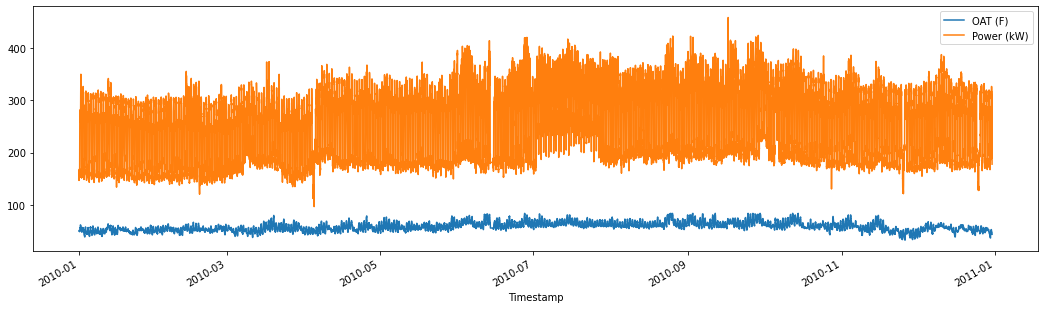

In [81]:
from scipy import stats
import numpy as np

std_3 = (np.abs(stats.zscore(df)) < 3).all(axis=1)

df = df[std_3]
df.dropna(inplace=True)
df.plot(figsize=(18,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7130b5ef40>,
      dtype=object)

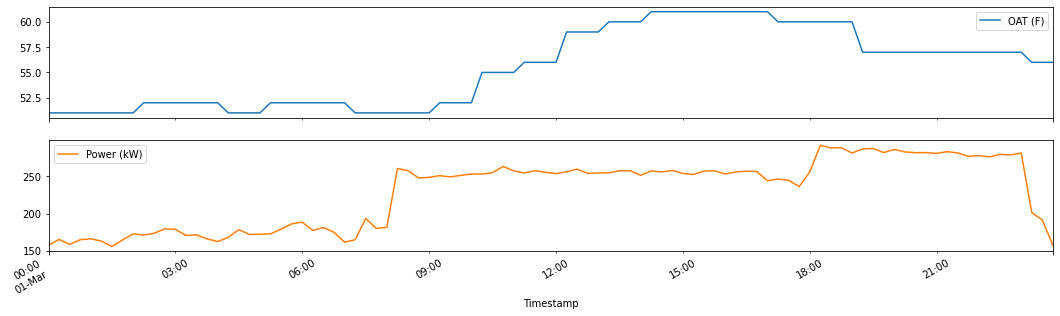

In [82]:
df.loc["2010-03-01"].plot(subplots=True, figsize=(18,5))

In [83]:
df["OAT (°C)"] = (df["OAT (F)"] - 32) / 1.8
df.drop(columns="OAT (F)", inplace=True)

<ipython-input-83-162ceeb8d3ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OAT (°C)"] = (df["OAT (F)"] - 32) / 1.8
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f71305accd0>,
      dtype=object)

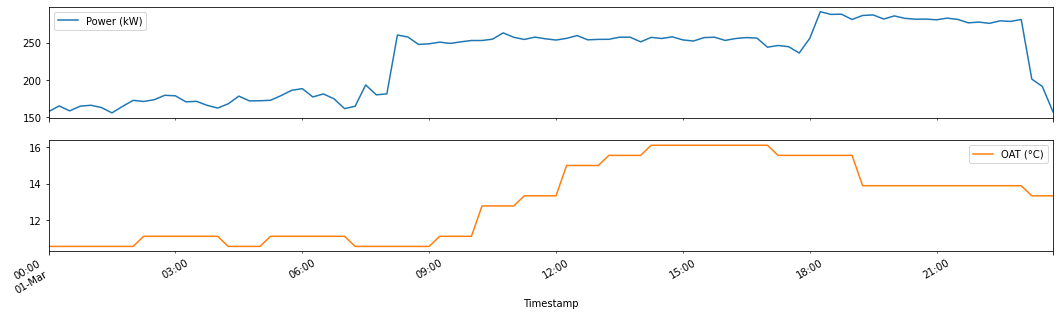

In [84]:
df.loc["2010-03-01"].plot(subplots=True, figsize=(18,5))

In [85]:
x = pd.DataFrame(df["OAT (°C)"])
y = pd.DataFrame(df['Power (kW)'])

In [76]:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
kfold = KFold(n_splits=3, shuffle=True)
model = LinearRegression()

In [94]:
for train, test in kfold.split(x, y):
    model.fit(x.iloc[train], y.iloc[train])
    print(model.score(x.iloc[test], y.iloc[test]))
    break;

0.8093579320005098


<ipython-input-95-0d4ac4301614>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_day['model'] = model.predict(x[day])


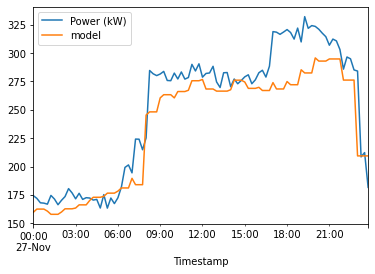

In [95]:
day = "2010-11-27"
test_day = y[day]
test_day['model'] = model.predict(x[day])
test_day.plot()

In [96]:
x['hour'] = x.index.hour
x = x.join(pd.get_dummies(x['hour'], prefix="hour")).drop(columns="hour")
x

ValueError: columns overlap but no suffix specified: Index(['hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [87]:
len(x), len(y)

(34577, 34577)

In [91]:
model.singular_

array([6.93102129e+02, 3.14648561e+01, 3.14312921e+01, 3.13665134e+01,
       3.12468450e+01, 3.12095019e+01, 3.11800316e+01, 3.11304076e+01,
       3.11051490e+01, 3.10888350e+01, 3.10644782e+01, 3.10592529e+01,
       3.10371733e+01, 3.10081341e+01, 3.09267581e+01, 3.08921919e+01,
       3.08462438e+01, 3.08405924e+01, 3.08038638e+01, 3.06532715e+01,
       3.06268189e+01, 3.05412436e+01, 3.03807981e+01, 2.63277764e+01,
       1.19536847e-14])